<a href="https://colab.research.google.com/github/Pavithrareddyvarra/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv("/content/bank.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


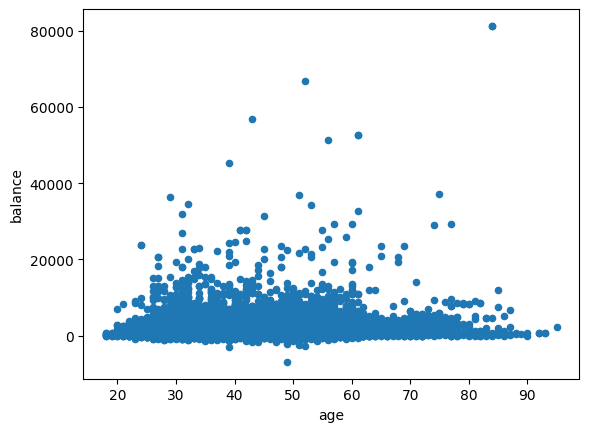

In [ ]:
# Scatterplot showing age and balance
df.plot(kind='scatter', x='age', y='balance');

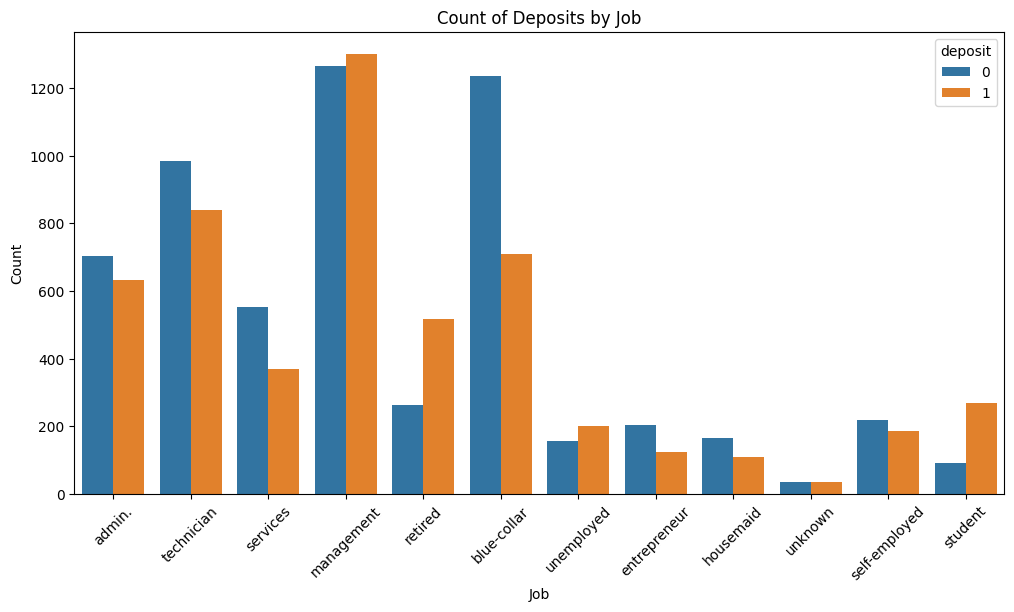

In [ ]:
# Count plot of job vs. deposit count

df['deposit'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.title('Count of Deposits by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1467,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1389,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,579,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,673,2,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
new_customer = {
    'age': 65,
    'balance': 1200000,
    'day': 15,
    'duration': 300,
    'campaign': 1,
    'pdays': -1,
    'previous': 0,
    'job_blue-collar': 0,
    'job_entrepreneur': 0,
    'job_housemaid': 0,
    'job_management': 1,
    'job_retired': 0,
    'job_self-employed': 0,
    'job_services': 0,
    'job_student': 0,
    'job_technician': 0,
    'job_unemployed': 0,
    'job_unknown': 0,
    'marital_married': 1,
    'marital_single': 0,
    'education_secondary': 1,
    'education_tertiary': 0,
    'education_unknown': 0,
    'default_yes': 0,
    'housing_yes': 0,
    'loan_yes': 0,
    'contact_telephone': 0,
    'contact_unknown': 0,
    'month_aug': 0,
        'month_aug': 0,
    'month_dec': 0,
    'month_feb': 0,
    'month_jan': 0,
    'month_jul': 0,
    'month_jun': 0,
    'month_mar': 0,
    'month_may': 1,
    'month_nov': 0,
    'month_oct': 0,
    'month_sep': 0,
    'poutcome_other': 0,
    'poutcome_success': 0,
    'poutcome_unknown': 1
}

# Convert the new customer data to a DataFrame
new_customer_df = pd.DataFrame([new_customer])